In [263]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [264]:
from __future__ import division

In [265]:
citibike_data = './2013-07 - Citi Bike trip data.csv'
citibike = pd.read_csv(citibike_data)

In [266]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1


In [267]:
df = citibike[['tripduration', 'starttime', 'usertype']]
df = df.dropna()

In [268]:
df1 = df[df.usertype == 'Subscriber']
df2 = df[df.usertype == 'Customer']

In [269]:
#df['Dura_Subs'] = df['tripduration'][df['usertype']=='Subscriber']
#df['Dura_Cust'] = df['tripduration'][df['usertype']=='Customer']

In [270]:
df1['datetime'] = pd.to_datetime(df.starttime).dt.hour
df1trip = df1['tripduration'].groupby([df1.datetime]).mean()
df1count = df1['tripduration'].groupby([df1.datetime]).count()

/Users/MISSZHOU/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [271]:
df2['datetime'] = pd.to_datetime(df.starttime).dt.hour
df2trip = df2['tripduration'].groupby([df2.datetime]).mean()
df2count = df2['tripduration'].groupby([df2.datetime]).count()

/Users/MISSZHOU/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [272]:
dfcount = df1count + df2count

In [273]:
#df1trip[0]
#col = ((df1trip.index)+10)/34
#color = pd.DataFrame(data=color)
#col.astype(float)
#c = np.array(col)


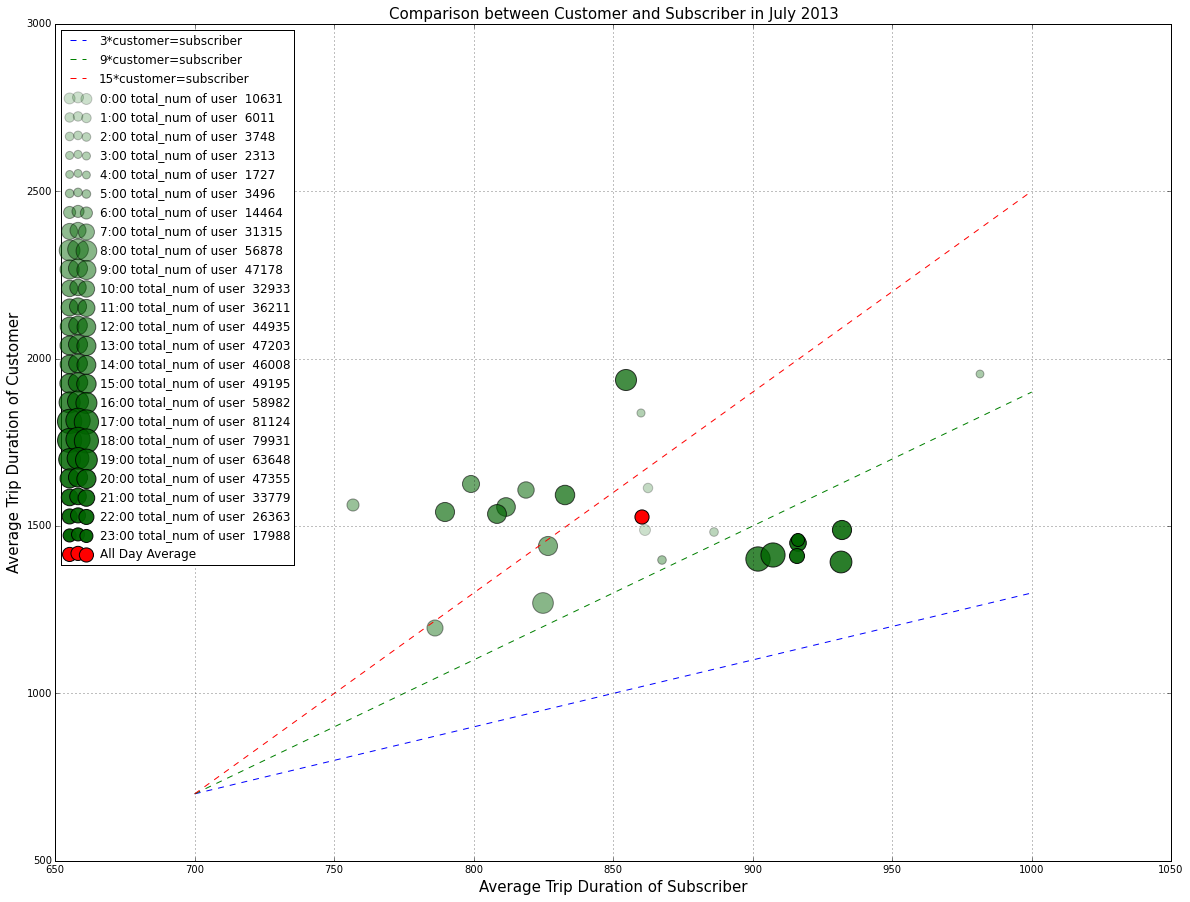

In [274]:
plt.figure(figsize=(20, 15))

for i in range(0,24):
    size = dfcount[i]/150+50
    #plt.scatter(df1trip[i], df2trip[i], s=size, label='{0}:00 total count  {1}'.format(i,dfcount[i]),c=c,alpha=0.7,cmap = 'cool')
    plt.scatter(df1trip[i], df2trip[i], s=size, label='{0}:00 total_num of user  {1}'.format(i,dfcount[i]),c='darkgreen',alpha=(i+6)/30)#,cmap = 'Blues_r')

pl.legend(fontsize=30,loc='left')   

pl.scatter(df1trip.mean(),df2trip.mean(),s=200,c='red',label='All Day Average')

plt.xlabel('Average Trip Duration of Subscriber',fontsize=15)
plt.ylabel('Average Trip Duration of Customer',fontsize=15)

pl.plot([700,1000],[700,1300],'--',label='3*customer=subscriber')
pl.plot([700,1000],[700,1900],'--',label='9*customer=subscriber')
pl.plot([700,1000],[700,2500],'--',label='15*customer=subscriber')
plt.legend(loc='best') 

plt.grid(True)
plt.title('Comparison between Customer and Subscriber in July 2013',fontsize=15)
plt.show()
plt.savefig('jz2308_AverageTripdurationComparison .png')